# Dimensionality Reduction Techniques on Image Data ( Fashion MNIST Data )

Section 1: Importing Data Dynamically

In [1]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
!pip install umap-learn

--2021-11-11 05:59:13--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.140.124
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.140.124|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [binary/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   4.22M  6.03MB/s    in 0.7s    

2021-11-11 05:59:14 (6.03 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [4422102/4422102]

--2021-11-11 05:59:14--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.140.124
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [2]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import umap
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from collections import OrderedDict
from functools import partial
from time import time
from matplotlib.ticker import NullFormatter


In [3]:
def load_mnist():

    """Load MNIST data from `path`"""
    labels_path = os.path.join('t10k-labels-idx1-ubyte.gz')
    images_path = os.path.join('t10k-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,     
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
data,labels = load_mnist()
data.shape

(10000, 784)

Digits dataset is a image dataset of handwritten digit having 1797 8×8 images

Import libraries and load dataset

Taking a sample image to view

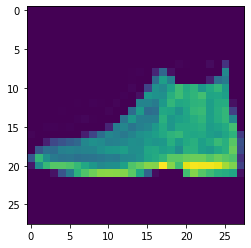

In [5]:
#image is in the form of numpy array.
image_sample = data[0, :].reshape(28, 28)
plt.imshow(image_sample)

# **1) PCA - Principal Component Analysis**

Reduce Image Dimensions

The data gets reduced from (10000, 64) to (10000, 2)

In [6]:
data.shape

(10000, 784)

In [7]:
pca_2 = PCA(2) # we need 2 principal components.
converted_data = pca_2.fit_transform(data)
 
converted_data.shape

(10000, 2)

Visualize the Resulting Dataset

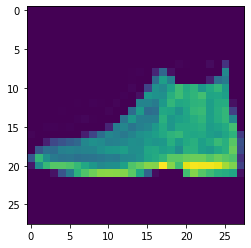

In [8]:
plt.imshow(data[0,:].reshape(28,28))

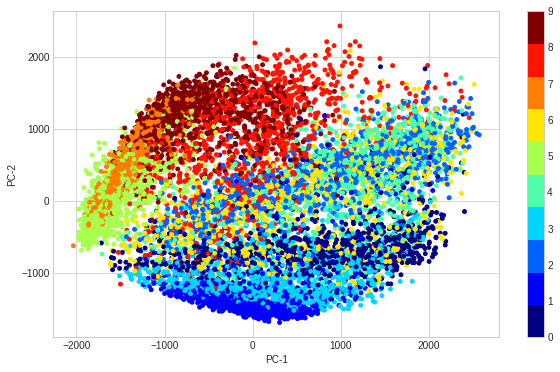

In [9]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [10]:
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_2.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  46.80761251887261


In [11]:
pca_64 = PCA(64) 
converted_data = pca_64.fit_transform(data)
converted_data.shape

(10000, 64)

In [12]:
print('Variance explained by the First PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[63])

Variance explained by the First PCs =  29.166946061170478
Variance explained by the First 2 PCs =  46.80761251887273
Variance explained by the First 5 PCs =  61.60610854421838
Variance explained by the First 10 PCs =  88.17432252992012


Reference: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

# **2) SVD - Single Value Decomposition**

In [13]:
trun_svd =  TruncatedSVD(n_components = 63)
A_transformed = trun_svd.fit_transform(data)

In [14]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(A_transformed[:2])

Transformed Matrix:
[[ 1.41339829e+03  1.27895335e+03 -5.20559563e+02  1.42885255e+02
   3.52850949e+01 -1.05829060e+02 -2.74232498e+02  1.74589166e+02
  -3.63679808e+02 -3.70291924e+02 -1.14435466e+02  1.30452517e+02
  -1.14954296e+02 -1.11317891e+01 -6.20967842e+01  5.58789342e+01
  -4.31941164e+01  1.48208881e+02  2.23429479e+00  7.60836023e+01
  -2.32476492e+02 -1.59364744e+02 -2.13910241e+02  8.61607347e+01
  -4.52089197e+01  1.07537556e+02 -1.53925990e+02  1.24198784e+02
   9.68484775e-01 -5.51627754e+01  6.65508946e+01  8.07086792e+00
   6.59174833e+01 -2.45473688e+01 -1.29661902e+02  1.04552176e+02
  -2.39853872e+02  2.36454724e+02 -1.43611011e+02 -5.15506065e+01
  -6.56353014e+01  1.76076675e+02 -1.82334834e+01  9.05306106e+01
  -1.21933501e+01  5.89648308e+01 -8.35925731e+00 -7.27121917e+00
  -5.01775678e+01 -1.55999580e+01 -7.93272566e-01 -3.64868885e+00
  -1.00275160e+02 -1.58103825e+02 -2.43656502e+01 -5.69475271e+01
   3.23593856e-01 -4.68028997e+01  1.20208055e+02 -5.953

In [15]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[62])

Variance explained by the First PCs =  24.918116260239092
Variance explained by the First 2 PCs =  44.20452334173133
Variance explained by the First 5 PCs =  61.3309504529383
Variance explained by the First 10 PCs =  88.03495223272105


In [16]:
trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(data)

In [17]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(A_transformed[:10])

Transformed Matrix:
[[ 1.41339829e+03  1.27895334e+03]
 [ 4.28410938e+03  2.42734925e+02]
 [ 2.50551998e+03 -1.38405085e+03]
 [ 1.71234996e+03 -1.14650289e+03]
 [ 2.60684999e+03  1.68074297e+01]
 [ 2.33644556e+03 -1.17466768e+03]
 [ 1.20191459e+03 -1.90103403e+02]
 [ 2.02399534e+03  2.99245947e-01]
 [ 4.53507639e+02  2.23199060e+02]
 [ 1.04636107e+03  7.87225265e+02]]


In [18]:
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  44.204523339226114


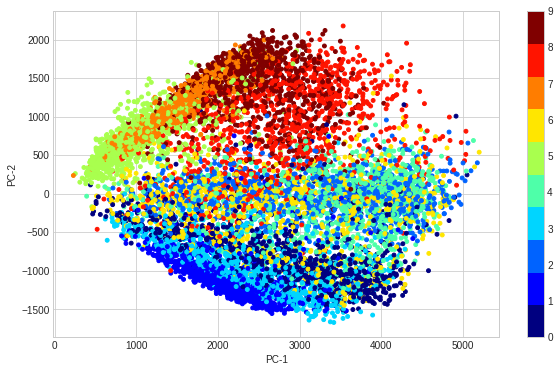

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(A_transformed[:, 0], A_transformed[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

# **3) LLE - Locally Linear Embedding**

In [20]:
embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(data)

In [21]:
X_transformed.shape

(10000, 2)

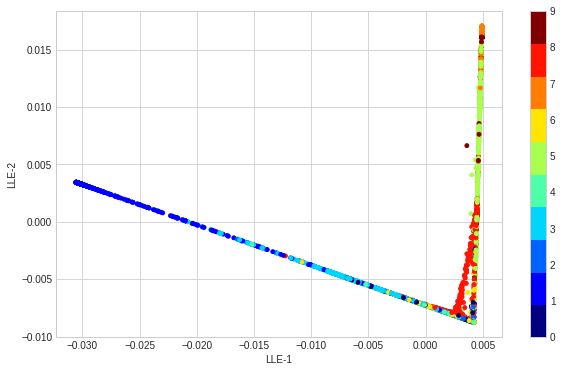

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [23]:
X_embedded = TSNE().fit_transform(data)
X_embedded.shape

(10000, 2)

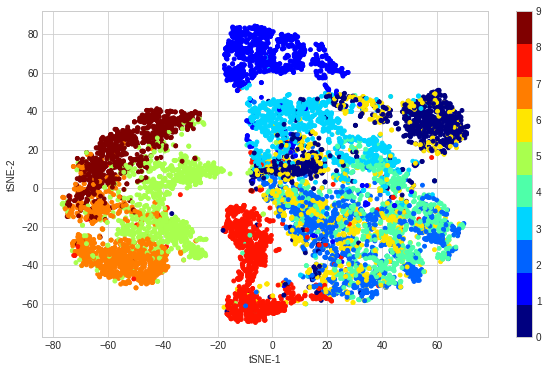

In [25]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

# **5) ISOMAP - Isometric Mapping**

In [26]:
embedding = Isomap(n_components = 2)
X_transformed = embedding.fit_transform(data)

In [27]:
X_transformed.shape

(10000, 2)

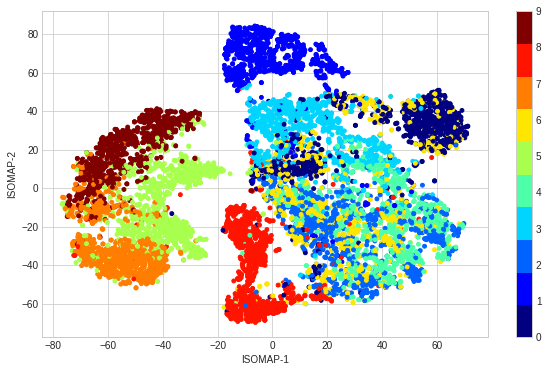

In [28]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

# **6) UMAP**

In [29]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'Embedding by UMAP')

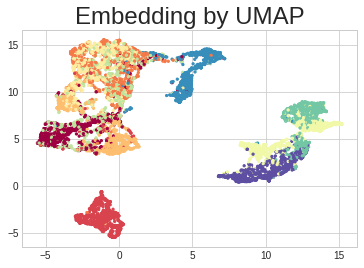

In [31]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = labels, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

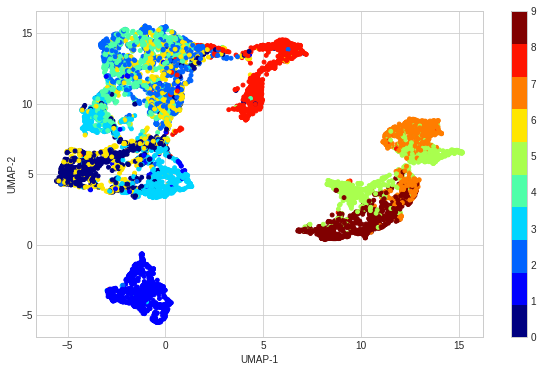

In [33]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

# **Plots of all techniques**

LLE: 1.9e+02 sec
t-SNE: 2.8e+02 sec
UMAP: 34 sec
ISOMAP: 2.5e+02 sec
SVD: 0.83 sec
PCA: 0.81 sec


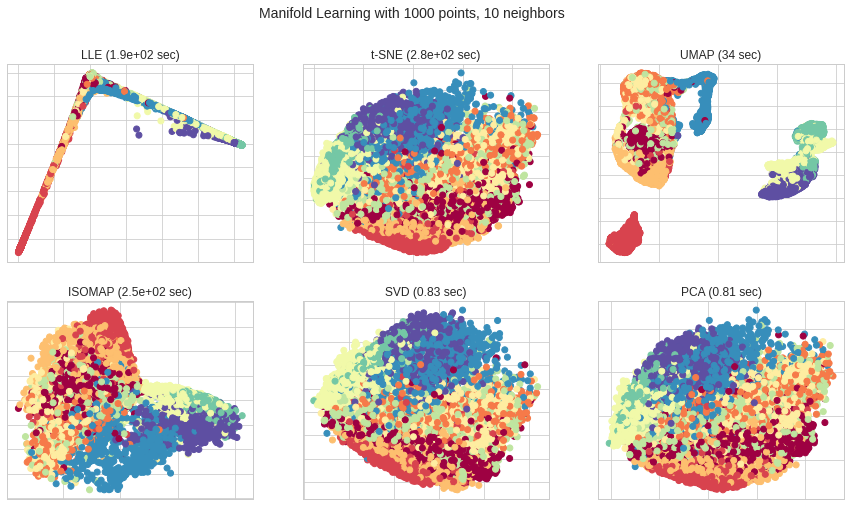

In [34]:
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, 10), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(LocallyLinearEmbedding,
              10, 2, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = TSNE(n_components=2, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(random_state=42)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(data)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

**Here, for the given dataset tSNE and UMAP is the best one among all six techniques because more number of datapoints are seperable.**